<a href="https://colab.research.google.com/github/oralcoder/IndustrialAI/blob/main/2-02.insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Medical Cost Personal Datasets

https://www.kaggle.com/mirichoi0218/insurance

#1.모듈 가져오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#2.데이터 가져오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/VISION/insurance.csv')

#3.데이터 분석

#### 데이터 규모, 컬럼의 의미, 컬럼 타입, 결측 값 확인
#### 중복된 항목 확인
#### 결측 값 처리
#### 상관관계 확인
#### 범주형 데이터 처리
#### 이상치 데이터 처리
#### 데이터 분리
#### 스케일링

##3.1. 데이터 규모, 컬럼의 의미, 컬럼 타입, 결측 값 확인


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0,yes,southwest,16884.92400
1,18.0,male,33.77,1,no,southeast,1725.55230
2,28.0,male,33.00,3,no,southeast,4449.46200
3,33.0,male,NaN,0,no,northwest,21984.47061
4,32.0,male,28.88,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   float64
 1   sex       1334 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


##3.2 중복된 항목 확인 / 제거

**중복된 항목 확인**

.duplicated([keep='first'|'last'| False])

* keep='first' : 첫 번째 중복된 값은 False, 나머지는 모두 True 반환

* keep='last' : 마지막 중복된 값은 False, 나머지는 모두 True 반환

* keep='False' : 중복이면 True 반환

**중복된 항목 삭제**

.drop_duplicates()



In [ ]:
# 중복 여부 출력
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [ ]:
# 중복이면 True 반환 -> True인 항목 출력
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19.0,male,30.59,0,no,northwest,1639.5631
581,19.0,male,30.59,0,no,northwest,1639.5631


In [ ]:
# 중복이면 True 반환(단 첫 번째 항목은 제외) -> True인 항목 삭제 -> Index 재정렬
df.drop_duplicates(keep="first", ignore_index=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1332 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.2+ KB


In [ ]:
df.iloc[581]

age              39.0
sex              male
bmi             45.43
children            2
smoker             no
region      southeast
charges     6356.2707
Name: 581, dtype: object

##3.3 결측치 처리


###3.3.1 결측치 확인 - info(), missingno()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1332 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.2+ KB


####결측치 확인 - missingno

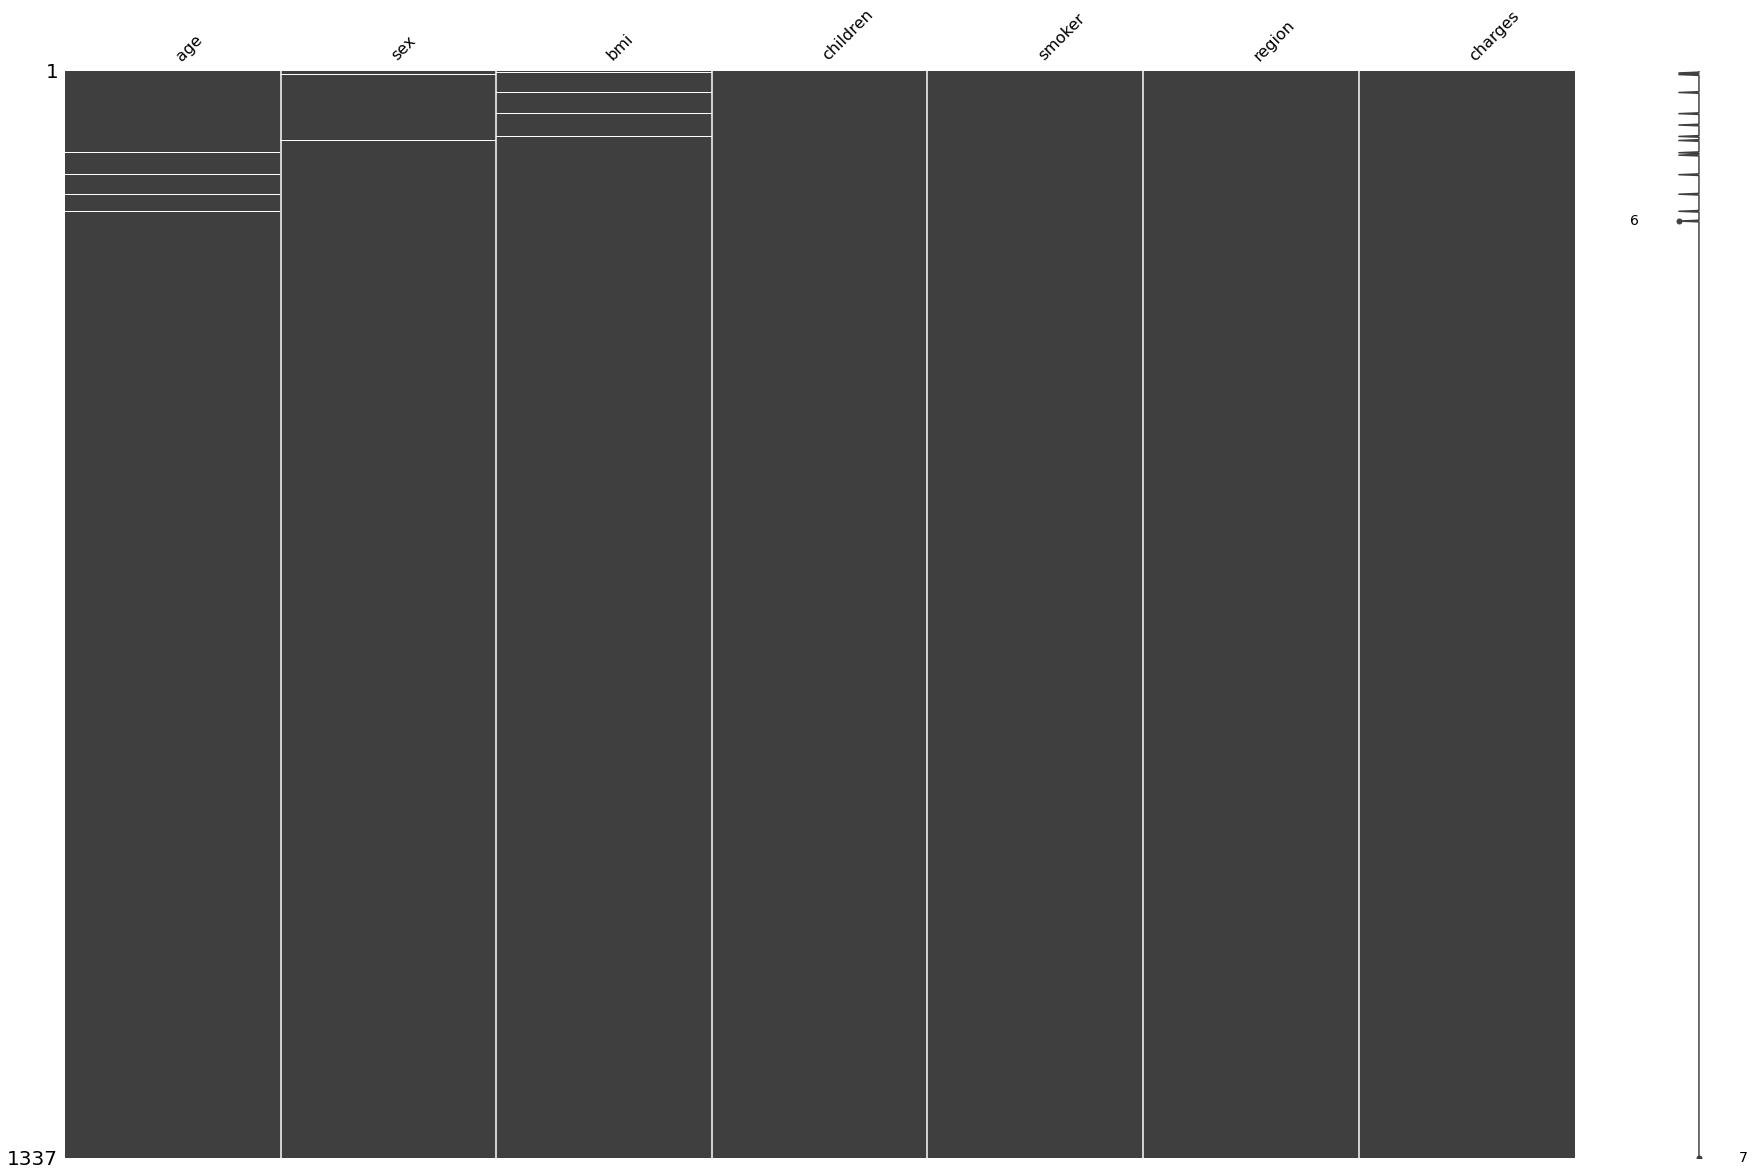

In [ ]:
import missingno
missingno.matrix(df, figsize=(30,20))

###3.3.2 결측치 채우기

**age - 중간 값으로 채우기**

**sex  - 최빈 값으로 채우기**

**bmi  = 평균으로 채우기**

####**age - 중간 값으로 채우기**

**fillna()**

**median()**

In [ ]:
# 중간 값 확인
df['age'].median()

39.0

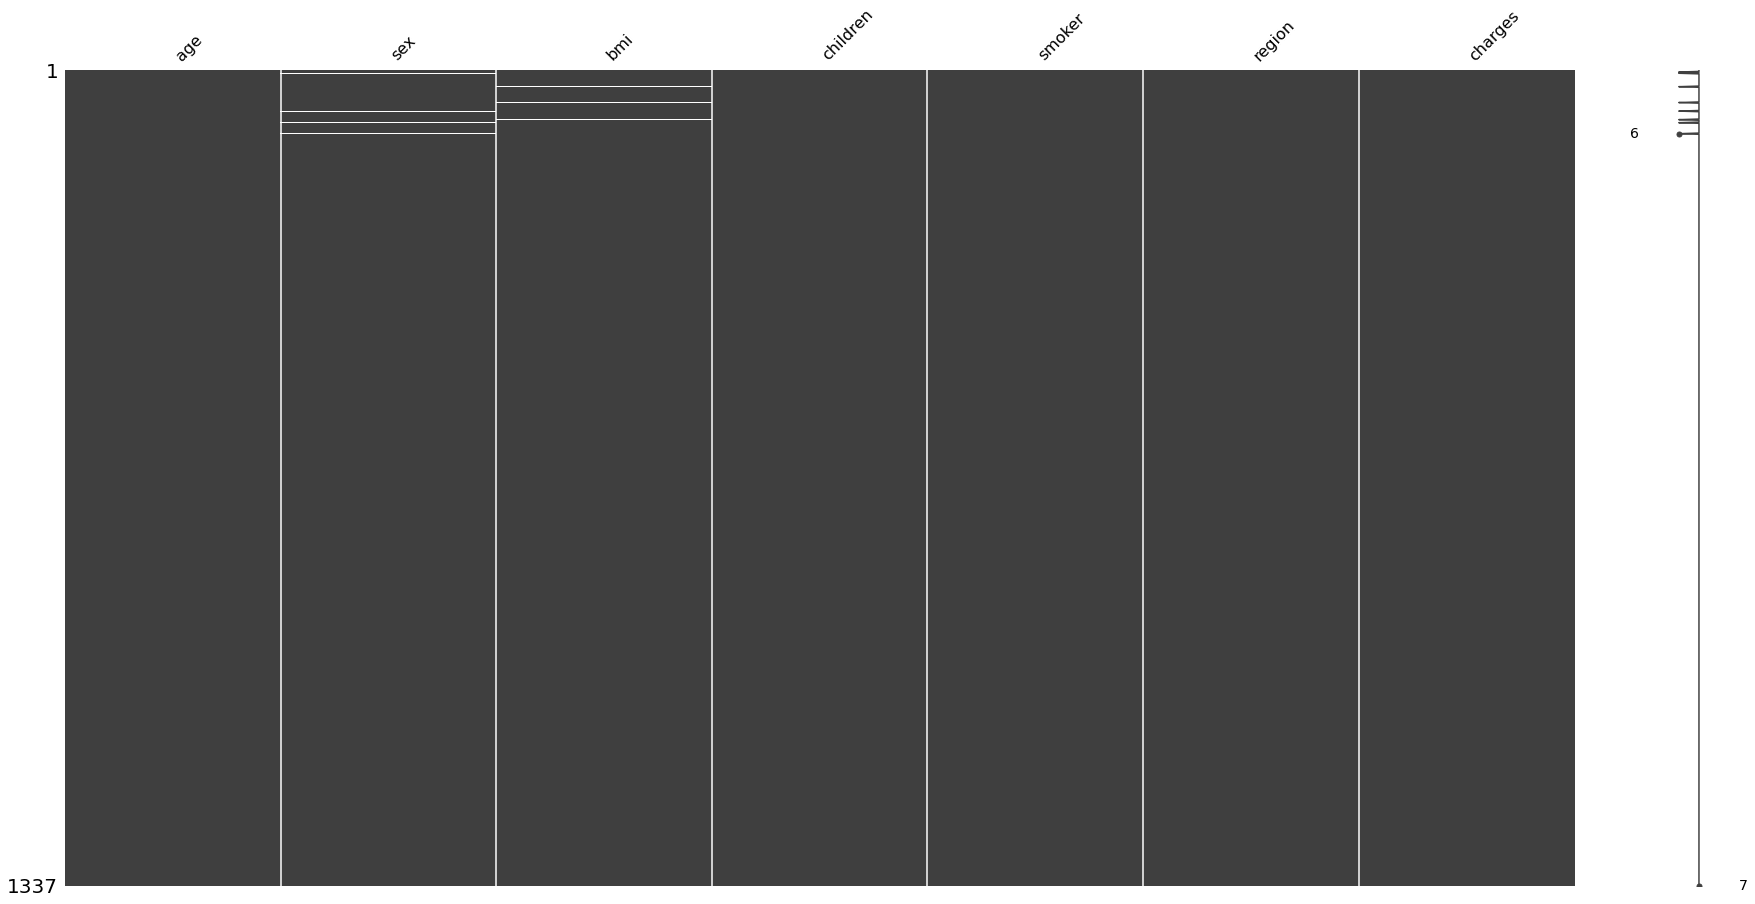

In [ ]:
# 중간 값으로 채우기
df['age'].fillna(df['age'].median(), inplace=True)
missingno.matrix(df, figsize=(30,15))

####**sex - 최빈값으로 채우기**

**idxmax()**

In [ ]:
# sex가 null인 행 확인
df[df['sex'].isnull()]

,age,sex,bmi,children,smoker,region,charges
5,31.0,NaN,25.740,0,no,southeast,3756.62160
67,40.0,NaN,26.315,1,no,northwest,6389.37785
86,57.0,NaN,31.160,0,yes,northwest,43578.93940
104,34.0,NaN,27.500,1,no,southwest,5003.85300


In [ ]:
# 최빈 성별 확인
df['sex'].value_counts().idxmax()

'male'

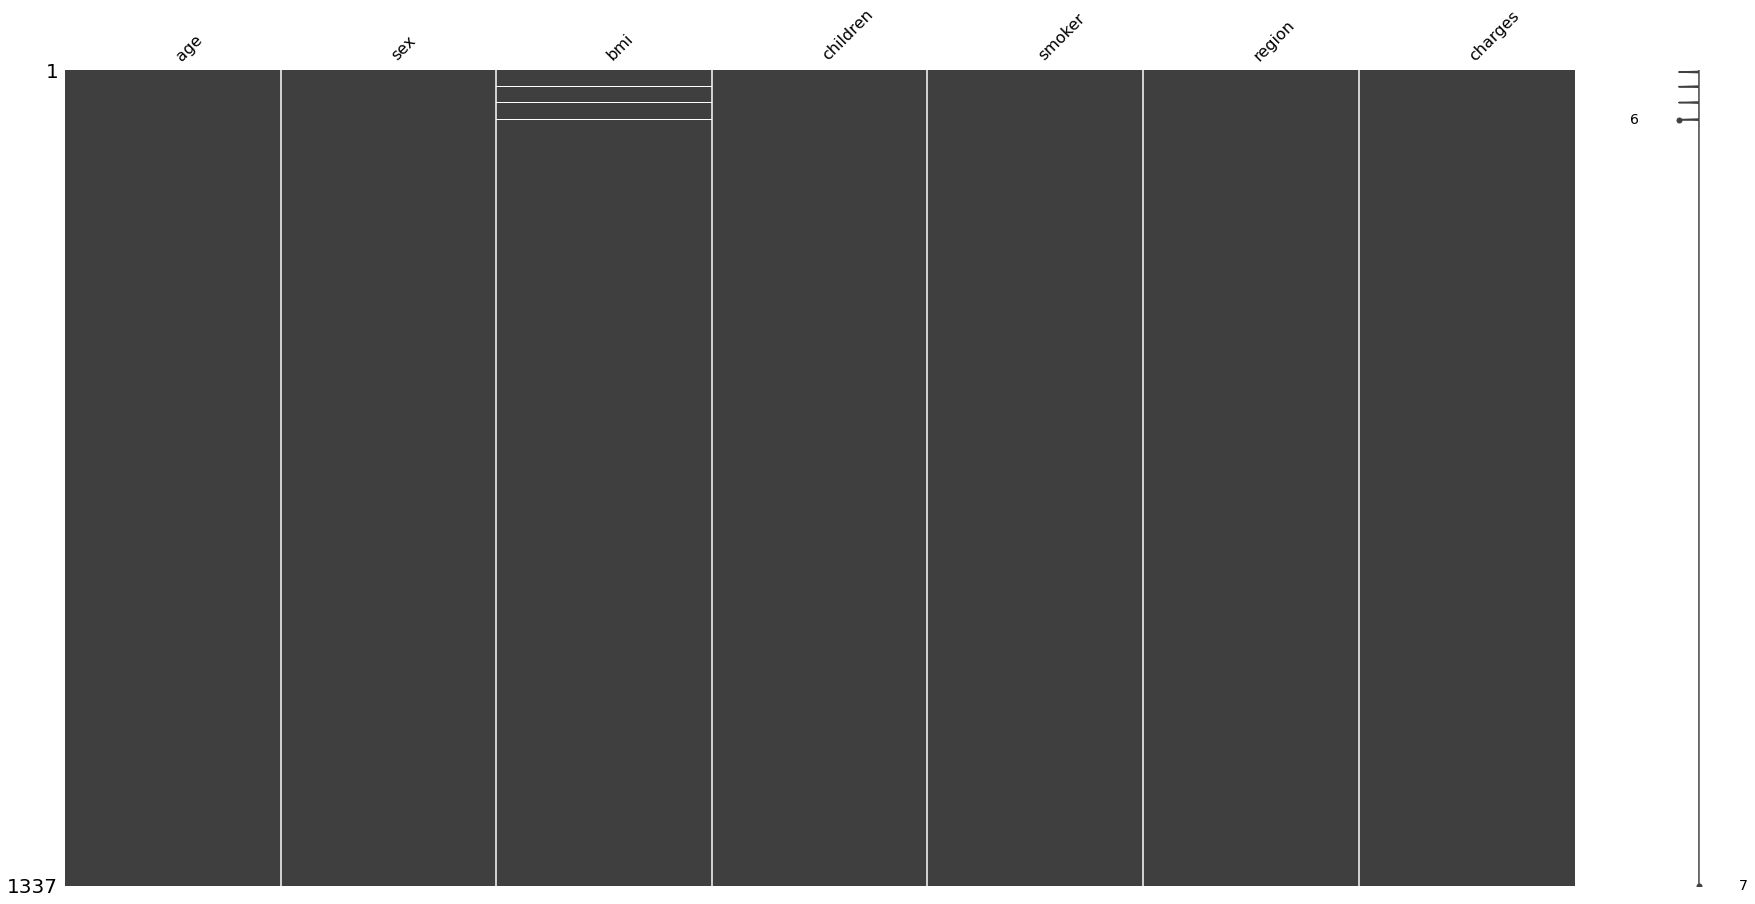

In [ ]:
# 최빈 값으로 채우기
df['sex'].fillna(df['sex'].value_counts().idxmax(), inplace=True)
missingno.matrix(df, figsize=(30,15))

In [ ]:
# 최빈값 male로 채워졌는지 확인
df.iloc[[5, 67, 86, 104]]

,age,sex,bmi,children,smoker,region,charges
5,31.0,male,25.740,0,no,southeast,3756.62160
67,40.0,male,26.315,1,no,northwest,6389.37785
86,57.0,male,31.160,0,yes,northwest,43578.93940
104,34.0,male,27.500,1,no,southwest,5003.85300


####**bmi - 평균으로 채우기**

mean()

In [ ]:
# bmi가 null인 행 출력
df[df['bmi'].isnull()]

,age,sex,bmi,children,smoker,region,charges
3,33.0,male,NaN,0,no,northwest,21984.47061
27,55.0,female,NaN,2,no,northwest,12268.63225
53,36.0,male,NaN,0,yes,southeast,37742.57570
81,45.0,female,NaN,0,no,northeast,7935.29115


In [ ]:
# 평균 bmi 출력
df['bmi'].mean()

30.65929482370593

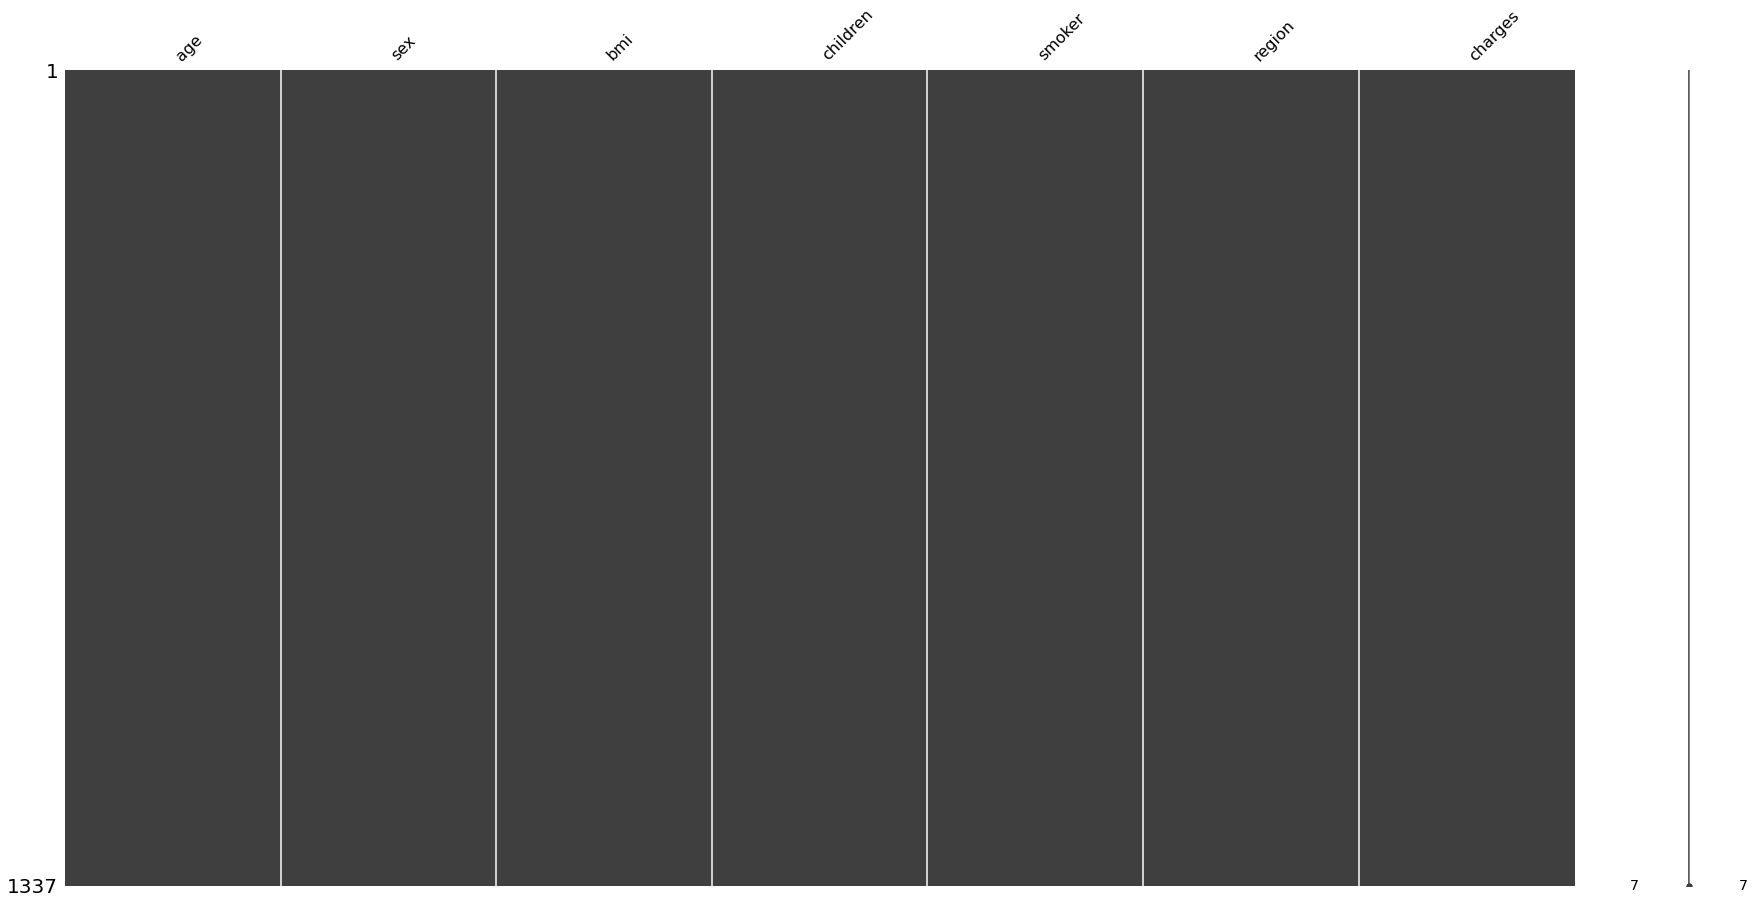

In [ ]:
# 평균 값으로 채우기
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
missingno.matrix(df, figsize=(30,15))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.2+ KB


##3.4 상관관계 분석

두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석



In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.108176,0.042222,0.298697
bmi,0.108176,1.000000,0.012962,0.198883
children,0.042222,0.012962,1.000000,0.067389
charges,0.298697,0.198883,0.067389,1.000000


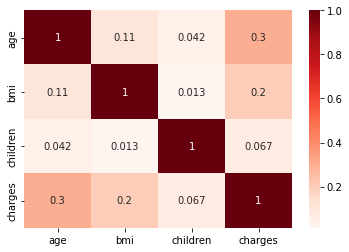

In [ ]:
sns.heatmap(df.corr(), cmap="Reds", annot=True)
plt.show()

##3.5 범주형 데이터 처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.2+ KB


In [ ]:
print(df['sex'].value_counts(), end='\n\n')
print(df['smoker'].value_counts(), end='\n\n')
print(df['region'].value_counts(), end='\n\n')

male      678
female    659
Name: sex, dtype: int64

no     1063
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64



**ML에서 학습용 데이터는 문자열(카테고리형) feature를 허용하지 않음**

**`Categorical encoding`: 카테고리형 데이터를 숫자형으로 변환하는 작업**

* Label Encoding: 알파벳 순으로 숫자를 할당해주는 방식

  e.g., female -> 0, male -> 1

  숫자로 변환된 값은 크고 작음의 개념이 추가되기 때문에 실제 학습에 영향을 미칠 수 있어 Regression 에는 사용하지 않는 것을 권장

* One-Hot Encoding: feature 값의 유형에 따라 새로운 feature(column)을 추가하고 해당되는 feature에만 1로 표시하는 방식

    e.g., male, male, female, male

    ->

|sex_female|sex_male|
|------|---|
|0|1|
|0|1|
|1|0|
|0|1|



####**One-Hot Encoding**

get_dummies(data, columns)
* data: one-Hot Encoding을 적용할 데이터

* columns: one-Hot Encoding될 feature(column)

In [ ]:
df = pd.get_dummies(data = df, columns = ['sex', 'smoker', 'region'])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900000,0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770000,1,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000000,3,4449.46200,0,1,1,0,0,0,1,0
3,33.0,30.659295,0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880000,0,3866.85520,0,1,1,0,0,1,0,0


##3.6 이상치 제거

####**BoxPlot 확인**

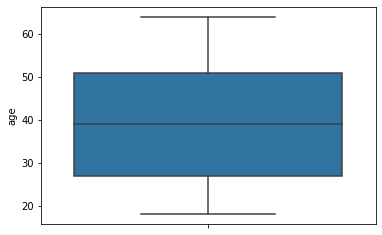

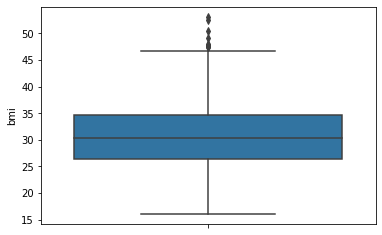

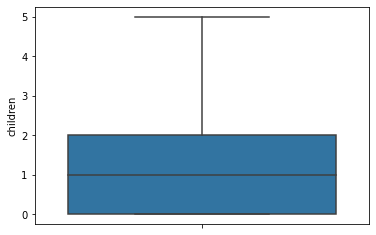

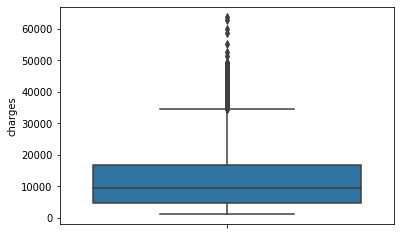

In [ ]:
sns.boxplot(data = df, y='age')
plt.show()
sns.boxplot(data = df, y='bmi')
plt.show()
sns.boxplot(data = df, y='children')
plt.show()
sns.boxplot(data = df, y='charges')
plt.show()

**사분위수 범위: IQR(InterQuartile Range)**

자료 집합의 중간 50%에 포함되는 자료의 산포도

자료를 동일한 비율로 4등분 했을 때의 위치(Q1, Q2, Q3)

IQR
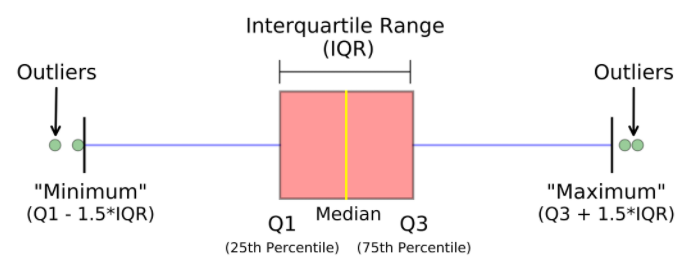

In [ ]:
print(df['bmi'].describe())
Q1 = (np.percentile(df['bmi'].values, 25))
Q3 = (np.percentile(df['bmi'].values, 75))
IQR = Q3 - Q1
lower = Q1 - (IQR*1.5)
upper = Q3 + (IQR*1.5)
print(lower, upper)

count    1337.000000
mean       30.659295
std         6.091868
min        15.960000
25%        26.315000
50%        30.400000
75%        34.675000
max        53.130000
Name: bmi, dtype: float64
13.775000000000007 47.21499999999999


**시그마법**


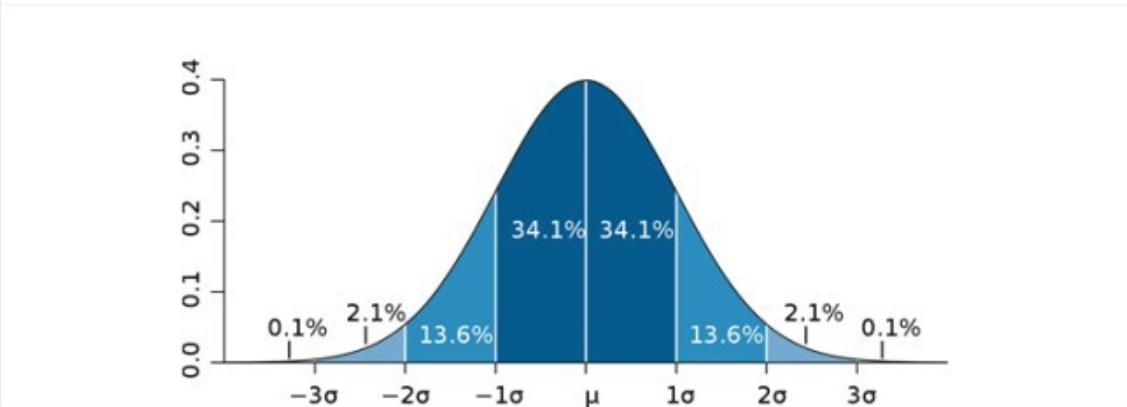

In [ ]:
print(df['bmi'].describe())
mean = df['bmi'].mean()
std = df['bmi'].std()
lower = mean - (3*std)
upper = mean + (3*std)
print(lower, upper)

count    1337.000000
mean       30.659295
std         6.091868
min        15.960000
25%        26.315000
50%        30.400000
75%        34.675000
max        53.130000
Name: bmi, dtype: float64
12.3836911494401 48.93489849797176


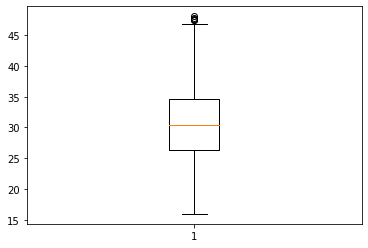

In [ ]:
df = df[(df['bmi'] >= lower) & (df['bmi'] <= upper)]
plt.boxplot(df['bmi'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1333 non-null   float64
 1   bmi               1333 non-null   float64
 2   children          1333 non-null   int64  
 3   charges           1333 non-null   float64
 4   sex_female        1333 non-null   uint8  
 5   sex_male          1333 non-null   uint8  
 6   smoker_no         1333 non-null   uint8  
 7   smoker_yes        1333 non-null   uint8  
 8   region_northeast  1333 non-null   uint8  
 9   region_northwest  1333 non-null   uint8  
 10  region_southeast  1333 non-null   uint8  
 11  region_southwest  1333 non-null   uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 62.5 KB


#4. 학습 데이터 준비

##4.1 학습 데이터와 테스트 데이터 분리

**사이킷런**(Scikit-Learn) - [https://scikit-learn.org/](https://scikit-learn.org/)

파이썬으로 구현된 머신 러닝 오픈 소스 라이브러리

지도 / 비지도 학습, 모델 선택 및 평가, 데이터 변환 등 머신러닝에 필요한 대부분의 기능 제공

데이터 마이닝 기반의 머신러닝에서 인기가 좋음

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1333 non-null   float64
 1   bmi               1333 non-null   float64
 2   children          1333 non-null   int64  
 3   charges           1333 non-null   float64
 4   sex_female        1333 non-null   uint8  
 5   sex_male          1333 non-null   uint8  
 6   smoker_no         1333 non-null   uint8  
 7   smoker_yes        1333 non-null   uint8  
 8   region_northeast  1333 non-null   uint8  
 9   region_northwest  1333 non-null   uint8  
 10  region_southeast  1333 non-null   uint8  
 11  region_southwest  1333 non-null   uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 62.5 KB


In [ ]:
from sklearn.model_selection import train_test_split
# Features
X = df[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']]
# Label
Y = df['charges']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=25)

In [ ]:
print(f'X: {X.shape}, train: {trainX.shape}, test: {testX.shape}')
print(f'Y: {Y.shape}, train: {trainY.shape}, test: {testY.shape}')

X: (1333, 11), train: (1066, 11), test: (267, 11)
Y: (1333,), train: (1066,), test: (267,)


In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900000,0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770000,1,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000000,3,4449.46200,0,1,1,0,0,0,1,0
3,33.0,30.659295,0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880000,0,3866.85520,0,1,1,0,0,1,0,0


##4.1 스케일링

변수들 간의 단위 차이가 있을 때 필요함

* MinMaxScaler: 최소/최대값이 각각 0, 1이 되도록 스케일링
  
  (x - 최소값) / (최대값 - 최소값)

* StandardScaler: 평균이 0 분산이 1인 정규분포가 되도록 스케일링

  (x - 평균) / 표준편차

* train Data에 대해서는 fit_transform()을, test Data에 대해서는 transform() 함수를 적용해야 함
  
  : fit : 평균 𝜇과  표준편차 𝜎를 계산하는 작업
  
  : transform: 정규화 작업
  
  : 학습 데이터에서 계산한 평균과 표준편차를 사용하여 테스트 데이터도 정규화하기 위함

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

In [ ]:
trainX[0:10]

array([[-1.36266496,  0.45978626, -0.91651073, -0.98141102,  0.98141102,
         0.49530506, -0.49530506, -0.58529417, -0.5621827 ,  1.65540052,
        -0.55784685],
       [ 0.40698667, -1.04381299,  3.24093795, -0.98141102,  0.98141102,
         0.49530506, -0.49530506, -0.58529417, -0.5621827 ,  1.65540052,
        -0.55784685],
       [ 0.69013094, -1.1213267 ,  1.57795848,  1.01894108, -1.01894108,
        -2.01895777,  2.01895777,  1.70854255, -0.5621827 , -0.60408342,
        -0.55784685],
       [ 1.18563339, -1.77060819, -0.91651073, -0.98141102,  0.98141102,
        -2.01895777,  2.01895777,  1.70854255, -0.5621827 , -0.60408342,
        -0.55784685],
       [-0.65480431, -0.36119227, -0.085021  ,  1.01894108, -1.01894108,
         0.49530506, -0.49530506, -0.58529417,  1.77878118, -0.60408342,
        -0.55784685],
       [ 0.19462848,  1.79252195, -0.085021  ,  1.01894108, -1.01894108,
         0.49530506, -0.49530506,  1.70854255, -0.5621827 , -0.60408342,
        -0.557

#5. 학습


##5.1 Linear Regression 알고리즘 적용

In [ ]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
model = alg.fit(trainX, trainY)
print(model.coef_)
print(model.intercept_)

[ 3.39625935e+03  2.08534446e+03  5.30046386e+02  2.05432636e+15
  2.05432636e+15 -5.38355948e+16 -5.38355948e+16  1.59559738e+15
  1.56347559e+15  1.61985656e+15  1.55716325e+15]
13268.356529189236


##5.2 모델 평가

In [ ]:
predML = model.predict(testX)

In [ ]:
scoreML = model.score(testX, testY)
print(scoreML)

0.7867862264404814


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mseML = mean_squared_error(testY, predML)
maeML = mean_absolute_error(testY, predML)
print(f'MSE: {mseML}')
print(f'MAE: {maeML}')
#print('RMSE:',np.sqrt(mean_squared_error(testY, predML)))

MSE: 32819266.70554123
MAE: 4157.600458213398


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


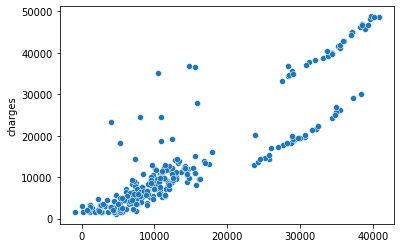

In [ ]:
sns.scatterplot(predML, testY)

**  **

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(1066, 11) (1066,) (267, 11) (267,)


In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

print(type(trainX), type(trainY), trainX, trainY)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> [[-1.36266496  0.45978626 -0.91651073 ... -0.5621827   1.65540052
  -0.55784685]
 [ 0.40698667 -1.04381299  3.24093795 ... -0.5621827   1.65540052
  -0.55784685]
 [ 0.69013094 -1.1213267   1.57795848 ... -0.5621827  -0.60408342
  -0.55784685]
 ...
 [ 1.53956372 -0.3770284  -0.085021   ...  1.77878118 -0.60408342
  -0.55784685]
 [-0.51323218  1.12740433 -0.085021   ... -0.5621827  -0.60408342
  -0.55784685]
 [ 0.26541454  0.66815644 -0.085021   ...  1.77878118 -0.60408342
  -0.55784685]] [ 1391.5287   9788.8659  24106.91255 ... 28868.6639   4667.60765
  7727.2532 ]


In [ ]:
trainX

array([[-1.36266496,  0.45978626, -0.91651073, ..., -0.5621827 ,
         1.65540052, -0.55784685],
       [ 0.40698667, -1.04381299,  3.24093795, ..., -0.5621827 ,
         1.65540052, -0.55784685],
       [ 0.69013094, -1.1213267 ,  1.57795848, ..., -0.5621827 ,
        -0.60408342, -0.55784685],
       ...,
       [ 1.53956372, -0.3770284 , -0.085021  , ...,  1.77878118,
        -0.60408342, -0.55784685],
       [-0.51323218,  1.12740433, -0.085021  , ..., -0.5621827 ,
        -0.60408342, -0.55784685],
       [ 0.26541454,  0.66815644, -0.085021  , ...,  1.77878118,
        -0.60408342, -0.55784685]])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(11, )))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))

In [ ]:
model.compile(optimizer="ADAM", loss="mse", metrics=["mean_absolute_error"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(trainX, trainY, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 1ms/step - loss: 320124928.0000 - mean_absolute_error: 13267.9111
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 320077408.0000 - mean_absolute_error: 13266.3994
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 319997600.0000 - mean_absolute_error: 13263.8691
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 319855104.0000 - mean_absolute_error: 13259.7051
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 319620224.0000 - mean_absolute_error: 13252.9619
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 319260480.0000 - mean_absolute_error: 13242.6895
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 318711392.0000 - mean_absolute_error: 13227.8672
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 317916128.0000 - mean_absolute_error: 13206.9043
Epoch 9/500
34/34 [=====

In [ ]:
model.evaluate(testX, testY)

9/9 [==============================] - 0s 2ms/step - loss: 19879980.0000 - mean_absolute_error: 2835.2573


[19879980.0, 2835.25732421875]

In [ ]:
# 머신러닝 비용(손실)
print(mseML, maeML)

32819266.70554123 4157.600458213398


In [ ]:
pred = model.predict(testX)

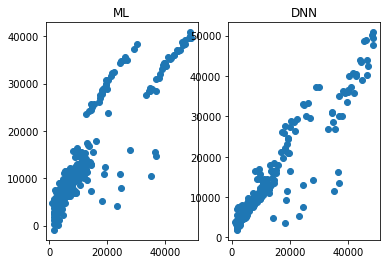

In [ ]:
# 시각화
plt.subplot(1,2,1)
plt.title('ML')
plt.scatter(testY, predML)
plt.subplot(1,2,2)
plt.title('DNN')
plt.scatter(testY, pred)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(testY, pred)
print("ML R2 :", scoreML)
print("DNN R2 :", r2)

ML R2 : 0.7867862264404814
DNN R2 : 0.8708476532197953
